Probemos buscar el mínimo de la función; ejercicio 01

$$ f(x, y) = \frac{1}{2} (a x^2 + b y^2) $$


In [51]:
import numpy as np
from pylab import *
import copy

In [52]:
# r es el vector X,Y; donde r[0] es X y r[1] es Y
# a y b son los coeficientes de la funcion cuadratica
def test_fn(r, a, b):
  return 0.5 * (a * r[0] ** 2 + b * r[1] ** 2)

# esta funcion esta calculada a mano, haciendo la derivada
def grad(r, a, b):
  return [a * r[0], b * r[1]]

aa = 1.0
bb = 0.1

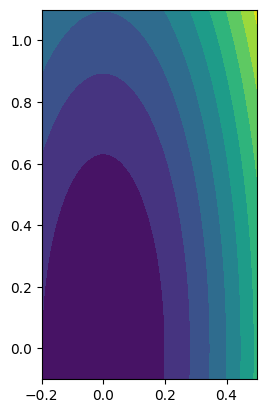

In [53]:
xx = np.linspace(-2*bb, 0.5, num=100)
yy = np.linspace(-bb, 1 + bb, num=200)
X, Y = np.meshgrid(xx, yy, indexing='ij')
rr = np.array([[(x, y) for x in xx] for y in yy])

contourf(X, Y, test_fn([X, Y], aa, bb), levels=10)
gca().set_aspect('equal')

## Metodo del Gradiente Descendiente
$x_{k+1}=x_{n}-\alpha \nabla f(x_{n})$

1. Se elige un punto de salida de manera aleatoria: (x0, y0)
2. Se calcula el gradiente en ese punto: $\nabla f(x_{n})$
3. Se determina el siguiente punto de acuerdo con: $x_{k+1}=x_{n}-\alpha \nabla f(x_{n})$
4. Se detiene el algoritmo con una de las siguientes condiciones de paro:
    - Se llega a un número máximo de iteraciones predeterminado "steps"
    - El tamaño del paso dado por el algoritmo es menor que un valor de tolerancia establecido

In [54]:
# Seteamos la cantidad de iteraciones (pasos) a realizar
Nsteps = 30

#Seteamos nuestro Alfa (tasa de aprendizaje)
step = 2.0 / (1 + bb)

xk = np.zeros(Nsteps + 1)
yk = np.zeros(Nsteps + 1)
fk = np.zeros(Nsteps + 1)

# El punto inicial es (bb, 1.0); nuestro X0
xk[0] = bb
yk[0] = 1.0
fk[0] = test_fn((bb, 1.0), aa, bb)

In [55]:
# Iteramos Nsteps veces, para obtener el nuevo punto
for ii in range(Nsteps):
  xk[ii + 1] = xk[ii] - step * grad((xk[ii], yk[ii]), aa, bb)[0]
  yk[ii + 1] = yk[ii] - step * grad((xk[ii], yk[ii]), aa, bb)[1]

  fk[ii + 1] = test_fn((xk[ii + 1], yk[ii + 1]), aa, bb)

# Punto minimo es
[xk[Nsteps], yk[Nsteps]]

x_grad = copy.copy(xk)
y_grad = copy.copy(yk)

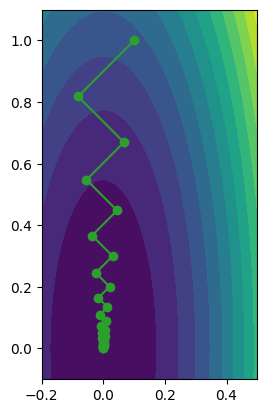

In [56]:
contourf(X, Y, test_fn([X, Y], aa, bb), levels=15)
plot(xk, yk, color='C2', marker='o')
gca().set_aspect('equal')

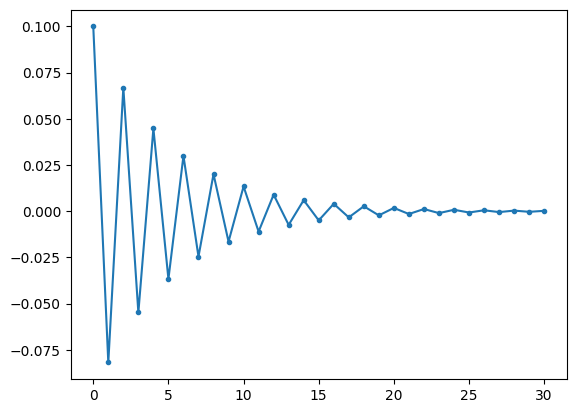

In [57]:
plot(xk, marker='.')

## Metodo del Gradiente Descendiente - Con Momentum
$ x_{k+1}=x_{k}-\alpha \nabla f(x_{k}) + \beta (x_{k} - x_{k-1}) $

o, lo que seria lo mismo:

$ x_{k+1}=x_{k}-\alpha z_{k} $

$ z_{k+1} = \beta z_{k} + \nabla f(x_{k+1}) $

In [58]:
# Seteamos la cantidad de iteraciones (pasos) a realizar
Nsteps = 30

#Seteamos nuestro Alfa y Beta
step = (2.0 / (1 + np.sqrt(bb))) ** 2
beta = ((1 - np.sqrt(bb)) / (1 + np.sqrt(bb))) ** 2

xk = np.zeros(Nsteps + 1)
yk = np.zeros(Nsteps + 1)
fk = np.zeros(Nsteps + 1)

wk = np.zeros(Nsteps + 1)
zk = np.zeros(Nsteps + 1)

# El punto inicial es (bb, 1.0); nuestro X0
xk[0] = bb
yk[0] = 1.0
fk[0] = test_fn((bb, 1.0), aa, bb)

wk[0] = grad((xk[0], yk[0]), aa, bb)[0]
zk[0] = grad((xk[0], yk[0]), aa, bb)[1]

In [59]:
# Iteramos Nsteps veces, para obtener el nuevo punto; pero ahora tambien usando el anterior
for ii in range(Nsteps):
  xk[ii + 1] = xk[ii] - step * wk[ii]
  yk[ii + 1] = yk[ii] - step * zk[ii]
  
  fk[ii + 1] = test_fn((xk[ii+1], yk[ii+1]), aa, bb)

  wk[ii + 1] = beta * wk[ii] + grad((xk[ii + 1], yk[ii + 1]), aa, bb)[0]
  zk[ii + 1] = beta * zk[ii] + grad((xk[ii + 1], yk[ii + 1]), aa, bb)[1]

# Punto minimo es
[xk[Nsteps], yk[Nsteps]]

x_mom = copy.copy(xk)
y_mom = copy.copy(yk)

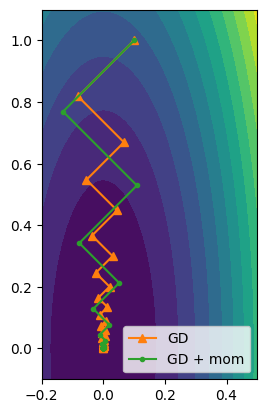

In [60]:
contourf(X, Y, test_fn([X, Y], aa, bb), levels=15)
plot(x_grad, y_grad, color='C1', marker='^', label='GD')
plot(x_mom, y_mom, color='C2', marker='.', label='GD + mom')
legend()
gca().set_aspect('equal')

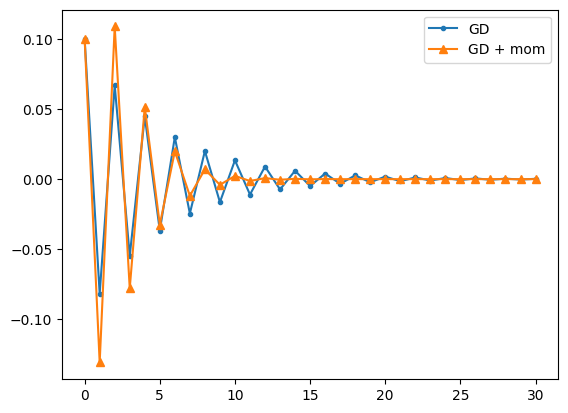

In [61]:
plot(x_grad, color='C0', marker='.', label='GD')
plot(x_mom, color='C1', marker='^', label='GD + mom')
legend()

## Metodo del Gradiente Descendiente - Con Nesterov

$ x_{k+1}=x_{k}-z_{k+1} $

$ z_{k+1} = \beta z_{k} + \alpha \nabla f(x_{k} - \beta z_{k}) $

In [74]:
# Seteamos la cantidad de iteraciones (pasos) a realizar
Nsteps = 1000

#Seteamos nuestro Alfa y Beta
step = 0.001
beta = 0.9

xk = np.zeros(Nsteps + 1)
yk = np.zeros(Nsteps + 1)
fk = np.zeros(Nsteps + 1)

wk = np.zeros(Nsteps + 1)
zk = np.zeros(Nsteps + 1)

# El punto inicial es (bb, 1.0); nuestro X0
xk[0] = bb
yk[0] = 1.0
fk[0] = test_fn((bb, 1.0), aa, bb)

wk[0] = grad((xk[0], yk[0]), aa, bb)[0]
zk[0] = grad((xk[0], yk[0]), aa, bb)[1]

In [75]:
# Iteramos Nsteps veces, para obtener el nuevo punto; pero ahora tambien usando el anterior
for ii in range(Nsteps):
    grad_x, grad_y = grad((xk[ii] - beta * wk[ii], yk[ii] + beta * zk[ii]), aa, bb)

    wk[ii + 1] = beta * wk[ii] + step * grad_x
    zk[ii + 1] = beta * zk[ii] + step * grad_y

    xk[ii + 1] = xk[ii] - wk[ii + 1]
    yk[ii + 1] = yk[ii] - zk[ii + 1]

    fk[ii + 1] = test_fn((xk[ii+1], yk[ii+1]), aa, bb)


# Punto minimo es
[xk[Nsteps], yk[Nsteps]]

x_nes = copy.copy(xk)
y_nes = copy.copy(yk)

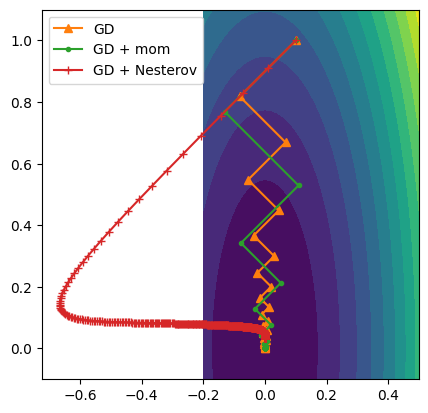

In [76]:
contourf(X, Y, test_fn([X, Y], aa, bb), levels=15)
plot(x_grad, y_grad, color='C1', marker='^', label='GD')
plot(x_mom, y_mom, color='C2', marker='.', label='GD + mom')
plot(x_nes, y_nes, color='C3', marker='+', label='GD + Nesterov')
legend()
gca().set_aspect('equal')

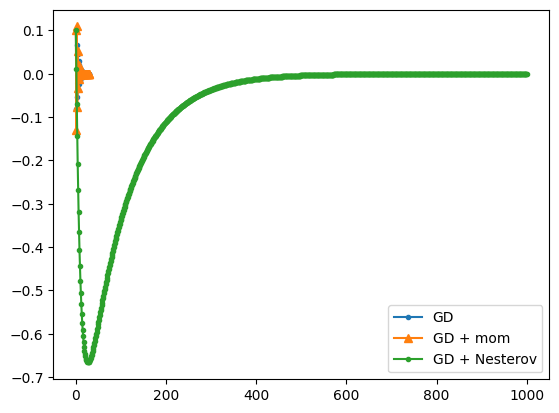

In [77]:
plot(x_grad, color='C0', marker='.', label='GD')
plot(x_mom, color='C1', marker='^', label='GD + mom')
plot(x_nes, color='C2', marker='.', label='GD + Nesterov')
legend()